# Auswertung der Zahlen ohne Grafik
Mal schauen wo es am meisten Firmen gibt - und ob der Vergleichswert auch was bringt.

In [5]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import time
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
import os
import re
folderpath=r"C:\Users\Zoe\Desktop\maz-datenjournalismus\Daten_BR_Handelsreg"

In [6]:
df_sauber=pd.read_csv(folderpath+"/BRFrames/ALLE_mit_Geocodes_Mercator_Format.csv")

In [7]:
df_sauber

,Unnamed: 0,Adresse,Firmen,Telbuch,Vergleich,Punkt
0,0,"Blegistrasse 9, Baar",43,14,3.071429,POINT (954108.180055073 5977402.167620105)
1,1,"Eichmattstrasse 97, Hünenberg See",34,4,8.500000,POINT (939896.1765000627 5971379.295402195)
2,3,"Luzernerstrasse 72, Hünenberg See",15,9,1.666667,POINT (940741.0135124999 5970753.269081736)
3,4,"Oberneuhofstrasse 5, Baar",12,1,12.000000,POINT (948041.8577951094 5972989.916176466)
4,5,"Zugerstrasse 195, Unterägeri",8,5,1.600000,POINT (953189.5270904789 5967008.713594971)
...,...,...,...,...,...,...
6969,6968,"Chamerstrasse 45, Zug",2,5,0.400000,POINT (946829.3049345199 5970466.332644048)
6970,6970,"Chamerstrasse 47, Zug",1,4,0.250000,POINT (946773.9869606089 5970498.748375669)
6971,6973,"Chamerstrasse 50, Zug",15,12,1.250000,POINT (946816.857483253 5970517.355532063)
6972,6976,"Chamerstrasse 52, Zug",11,5,2.200000,POINT (946783.0873992387 5970542.96645596)


In [8]:
df_sauber["STRNAME"]=df_sauber["Adresse"].str.extract("(\w*.*)\s\s?\d*.*\,.*")
#df_sauber["STRNAME"]=df_sauber["STNAME1"].str.extract("(\w*.*\w)..\d*.*")

In [9]:
df_sauber["GDENAME"]=df_sauber["Adresse"].str.extract("\w*.*\,.(.*)")

In [10]:
dfhr=df_sauber[["Adresse", "Firmen", "Telbuch","Vergleich", "STRNAME", "GDENAME"]]
dfhr.dtypes

Adresse       object
Firmen         int64
Telbuch        int64
Vergleich    float64
STRNAME       object
GDENAME       object
dtype: object

In [11]:
dfhr.head(50)

,Adresse,Firmen,Telbuch,Vergleich,STRNAME,GDENAME
0,"Blegistrasse 9, Baar",43,14,3.071429,Blegistrasse,Baar
1,"Eichmattstrasse 97, Hünenberg See",34,4,8.500000,Eichmattstrasse,Hünenberg See
2,"Luzernerstrasse 72, Hünenberg See",15,9,1.666667,Luzernerstrasse,Hünenberg See
3,"Oberneuhofstrasse 5, Baar",12,1,12.000000,Oberneuhofstrasse,Baar
4,"Zugerstrasse 195, Unterägeri",8,5,1.600000,Zugerstrasse,Unterägeri
5,"Erlenweg 8, Steinhausen",8,4,2.000000,Erlenweg,Steinhausen
6,"Suurstoffi 12B, Rotkreuz",7,1,7.000000,Suurstoffi,Rotkreuz
7,"Luzernerstrasse 103, Hünenberg See",6,3,2.000000,Luzernerstrasse,Hünenberg See
8,"Suurstoffi 12A, Rotkreuz",6,1,6.000000,Suurstoffi,Rotkreuz
9,"Suurstoffi 18B, Rotkreuz",5,2,2.500000,Suurstoffi,Rotkreuz


In [12]:
dfhr["STR_GMD"]=dfhr["STRNAME"]+", "+ dfhr["GDENAME"]

C:\Users\Zoe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
dfhr=dfhr[dfhr["Adresse"].str.contains("Baarerstrasse 11.2")==False] #ich eleiminiere eine falsche Adresse. 

Ich entscheide mich, Adressen mit weniger als 10 Firmen nicht zu berücksichtigen. 

# Hitparade 
- wo sind die meisten Firmen
- wo sind die Adressen mit mehr als 20 Firmen und einem grösseren Vergleichswert als 5
- wie sieht es aus wenn ich an den Auswahlkriterien rumschraube?


In [16]:
# Hier die Absolute Anzahl Firmen pro Ort
df_topfirmen=dfhr.sort_values("Firmen", ascending=False).head(20)
df_topfirmen.to_csv(folderpath+"/Zur_Verarbeitung_Grafik/Top_Firmen.csv")
df_topfirmen

,Adresse,Firmen,Telbuch,Vergleich,STRNAME,GDENAME,STR_GMD
6868,"Bahnhofstrasse 21, Zug",328,32,10.250000,Bahnhofstrasse,Zug,"Bahnhofstrasse, Zug"
6842,"Baarerstrasse 75, Zug",277,36,7.694444,Baarerstrasse,Zug,"Baarerstrasse, Zug"
259,"Haldenstrasse 5, Baar",258,44,5.863636,Haldenstrasse,Baar,"Haldenstrasse, Baar"
6953,"Chamerstrasse 172, Zug",220,27,8.148148,Chamerstrasse,Zug,"Chamerstrasse, Zug"
5992,"Dammstrasse 19, Zug",219,45,4.866667,Dammstrasse,Zug,"Dammstrasse, Zug"
260,"Gewerbestrasse 5, Cham",218,51,4.274510,Gewerbestrasse,Cham,"Gewerbestrasse, Cham"
261,"Neuhofstrasse 5A, Baar",216,34,6.352941,Neuhofstrasse,Baar,"Neuhofstrasse, Baar"
4055,"Neuhofstrasse 5a, Baar",214,34,6.294118,Neuhofstrasse,Baar,"Neuhofstrasse, Baar"
6299,"Industriestrasse 47, Zug",197,33,5.969697,Industriestrasse,Zug,"Industriestrasse, Zug"
6859,"Bahnhofstrasse 10, Zug",193,35,5.514286,Bahnhofstrasse,Zug,"Bahnhofstrasse, Zug"


In [20]:
df_topfirmen.set_index('Adresse', inplace=True)

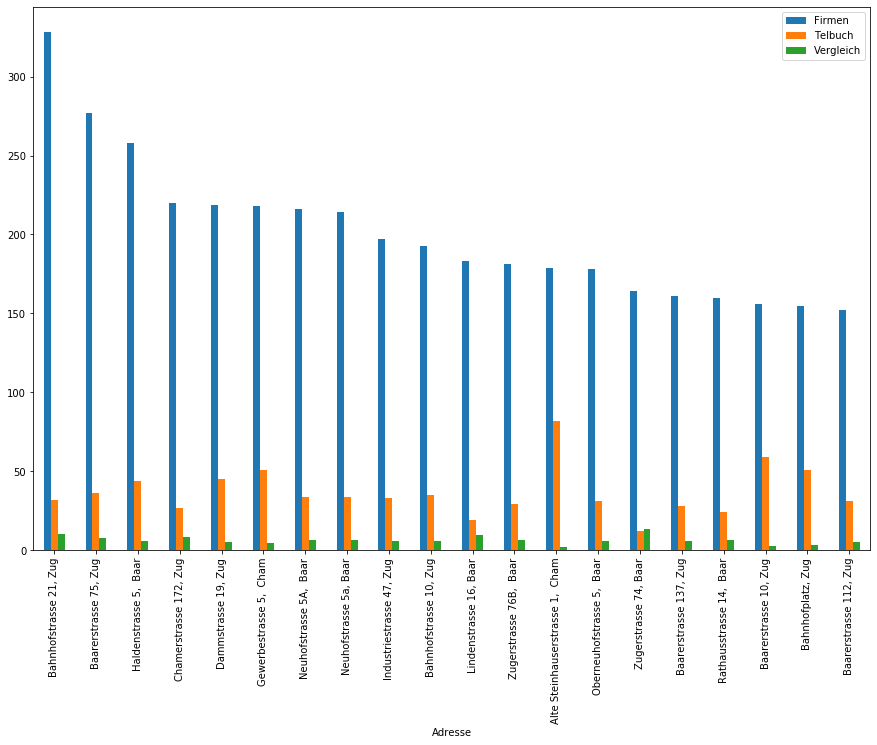

In [21]:
df_topfirmen[["Firmen","Telbuch", "Vergleich"]].plot(kind="bar", figsize=(15,10))

In [28]:
# So sieht die Hitparade des Vergleichswerts aus
df_topvergleich=dfhr[dfhr["Firmen"]>25].sort_values("Vergleich", ascending=False).head(20)
df_topvergleich.to_csv(folderpath+"/Zur_Verarbeitung_Grafik/Top_Vergleich.csv")
df_topvergleich

,Adresse,Firmen,Telbuch,Vergleich,STRNAME,GDENAME,STR_GMD
271,"Dammstrasse 16, Zug",92,3,30.666667,Dammstrasse,Zug,"Dammstrasse, Zug"
5993,"Dammstrasse 21, Zug",28,1,28.000000,Dammstrasse,Zug,"Dammstrasse, Zug"
6118,"Grafenauweg 10, Zug",99,6,16.500000,Grafenauweg,Zug,"Grafenauweg, Zug"
312,"Baarermattstrasse 3, Baar",31,2,15.500000,Baarermattstrasse,Baar,"Baarermattstrasse, Baar"
3668,"Zugerstrasse 74, Baar",164,12,13.666667,Zugerstrasse,Baar,"Zugerstrasse, Baar"
5591,"Sinserstrasse 65, Cham",59,5,11.800000,Sinserstrasse,Cham,"Sinserstrasse, Cham"
6867,"Bahnhofstrasse 20, Zug",148,13,11.384615,Bahnhofstrasse,Zug,"Bahnhofstrasse, Zug"
6140,"Gubelstrasse 11, Zug",149,14,10.642857,Gubelstrasse,Zug,"Gubelstrasse, Zug"
4985,"Hinterbergstrasse 49, Steinhausen",53,5,10.600000,Hinterbergstrasse,Steinhausen,"Hinterbergstrasse, Steinhausen"
5973,"Chamerstrasse 77, Zug",31,3,10.333333,Chamerstrasse,Zug,"Chamerstrasse, Zug"


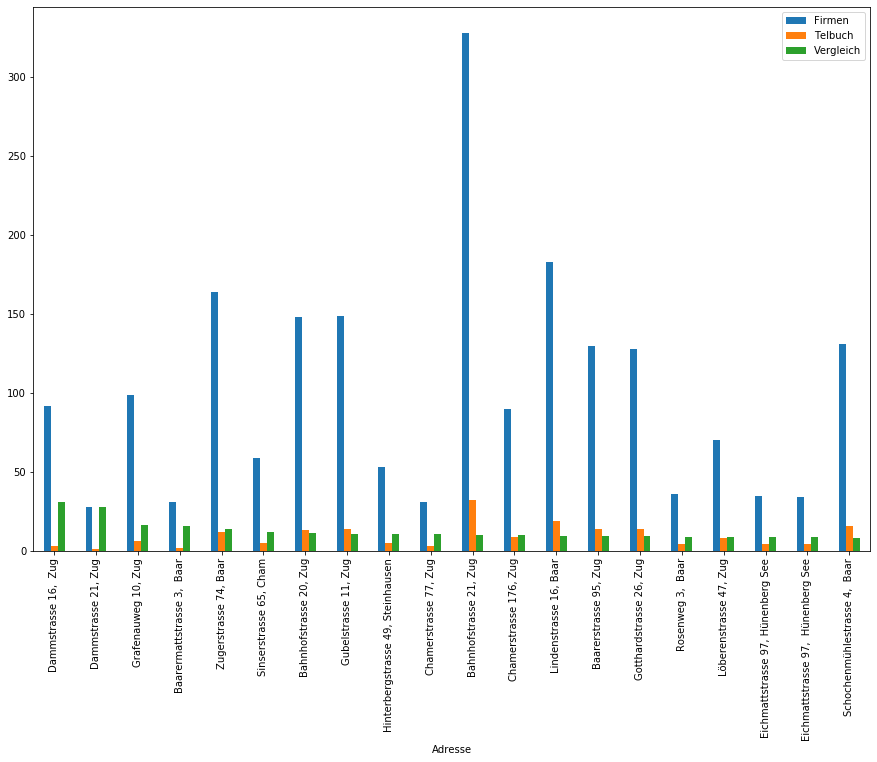

In [29]:
# Topvergleischswert-Adressen
df_topvergleich.set_index('Adresse', inplace=True)
df_topvergleich[["Firmen","Telbuch", "Vergleich"]].plot(kind="bar", figsize=(15,10))

In [29]:
#Nun mal bei allen schauen, die mehr als 20 Firmen haben und einen kleineren Wert als 
df_ue20min5=dfhr[(dfhr["Firmen"]>20) & (dfhr["Vergleich"]>5)].sort_values("Vergleich", ascending=False).head(20)
df_ue20min5.to_csv(folderpath+"/Zur_Verarbeitung_Grafik/Top_UE20F_Min5V.csv")
df_ue20min5

,Adresse,Firmen,Telbuch,Vergleich,STRNAME,GDENAME,STR_GMD
271,"Dammstrasse 16, Zug",92,3,30.666667,Dammstrasse,Zug,"Dammstrasse, Zug"
5993,"Dammstrasse 21, Zug",28,1,28.000000,Dammstrasse,Zug,"Dammstrasse, Zug"
321,"Industriestrasse 13C, Zug",24,1,24.000000,Industriestrasse,Zug,"Industriestrasse, Zug"
3877,"Gulmstrasse 35, Oberägeri",24,1,24.000000,Gulmstrasse,Oberägeri,"Gulmstrasse, Oberägeri"
6118,"Grafenauweg 10, Zug",99,6,16.500000,Grafenauweg,Zug,"Grafenauweg, Zug"
312,"Baarermattstrasse 3, Baar",31,2,15.500000,Baarermattstrasse,Baar,"Baarermattstrasse, Baar"
3668,"Zugerstrasse 74, Baar",164,12,13.666667,Zugerstrasse,Baar,"Zugerstrasse, Baar"
5591,"Sinserstrasse 65, Cham",59,5,11.800000,Sinserstrasse,Cham,"Sinserstrasse, Cham"
6865,"Bahnhofstrasse 17, Zug",23,2,11.500000,Bahnhofstrasse,Zug,"Bahnhofstrasse, Zug"
6867,"Bahnhofstrasse 20, Zug",148,13,11.384615,Bahnhofstrasse,Zug,"Bahnhofstrasse, Zug"


In [30]:
df_ue20min10=dfhr[(dfhr["Firmen"]>20) & (dfhr["Vergleich"]>10)].sort_values("Vergleich", ascending=False).head(20)
df_ue20min10.to_csv(folderpath+"/Zur_Verarbeitung_Grafik/Top_UE20F_Min10V.csv")
df_ue20min10

,Adresse,Firmen,Telbuch,Vergleich,STRNAME,GDENAME,STR_GMD
271,"Dammstrasse 16, Zug",92,3,30.666667,Dammstrasse,Zug,"Dammstrasse, Zug"
5993,"Dammstrasse 21, Zug",28,1,28.000000,Dammstrasse,Zug,"Dammstrasse, Zug"
321,"Industriestrasse 13C, Zug",24,1,24.000000,Industriestrasse,Zug,"Industriestrasse, Zug"
3877,"Gulmstrasse 35, Oberägeri",24,1,24.000000,Gulmstrasse,Oberägeri,"Gulmstrasse, Oberägeri"
6118,"Grafenauweg 10, Zug",99,6,16.500000,Grafenauweg,Zug,"Grafenauweg, Zug"
312,"Baarermattstrasse 3, Baar",31,2,15.500000,Baarermattstrasse,Baar,"Baarermattstrasse, Baar"
3668,"Zugerstrasse 74, Baar",164,12,13.666667,Zugerstrasse,Baar,"Zugerstrasse, Baar"
5591,"Sinserstrasse 65, Cham",59,5,11.800000,Sinserstrasse,Cham,"Sinserstrasse, Cham"
6865,"Bahnhofstrasse 17, Zug",23,2,11.500000,Bahnhofstrasse,Zug,"Bahnhofstrasse, Zug"
6867,"Bahnhofstrasse 20, Zug",148,13,11.384615,Bahnhofstrasse,Zug,"Bahnhofstrasse, Zug"


In [33]:
#Die Anzahl Adressen mit Firmen pro Strasse
dfhr.groupby("STR_GMD").count().sort_values("Firmen",ascending=False).head(20)

,Adresse,Firmen,Telbuch,Vergleich,STRNAME,GDENAME
STR_GMD,,,,,,
"Baarerstrasse, Zug",85,85,85,85,85,85
"Chamerstrasse, Zug",57,57,57,57,57,57
"Aegeristrasse, Zug",47,47,47,47,47,47
"Industriestrasse, Zug",37,37,37,37,37,37
"Zugerstrasse, Cham",35,35,35,35,35,35
"Zugerstrasse, Baar",34,34,34,34,34,34
"Zugerstrasse, Unterägeri",33,33,33,33,33,33
"Bösch, Hünenberg",32,32,32,32,32,32
"Zugerbergstrasse, Zug",30,30,30,30,30,30


In [34]:
#Voila, hier ganz Klar: Die Baarerstrasse hat die meisten Firmen
dfhr.groupby("STR_GMD").sum().sort_values("Firmen",ascending=False).head(20)

,Firmen,Telbuch,Vergleich
STR_GMD,,,
"Baarerstrasse, Zug",2841,1075,192.838505
"Bahnhofstrasse, Zug",1308,235,85.686359
"Bösch, Hünenberg",837,328,80.804701
"Chamerstrasse, Zug",733,302,110.937999
"Industriestrasse, Zug",616,245,64.182664
"Zugerstrasse, Baar",514,243,79.435026
"Poststrasse, Zug",502,143,41.054010
"Gubelstrasse, Zug",472,113,36.742560
"Oberneuhofstrasse, Baar",454,174,45.663411


In [42]:
# Hier die Werte geteilt durch die Anzahl STrassen
(dfhr.groupby("STR_GMD").sum()/dfhr.groupby("STR_GMD").count()).sort_values("Firmen", ascending=False).head(20)

,Adresse,Firmen,GDENAME,STRNAME,Telbuch,Vergleich
STR_GMD,,,,,,
"Untermüli, Zug",NaN,98.000000,NaN,NaN,33.000000,2.969697
"Alte Steinhauserstrasse, Cham",NaN,94.000000,NaN,NaN,60.000000,1.209884
"Gewerbestrasse, Cham",NaN,83.000000,NaN,NaN,27.500000,2.785285
"Bahnhofstrasse, Zug",NaN,76.941176,NaN,NaN,13.823529,5.040374
"Gewerbestrasse, Cham",NaN,75.000000,NaN,NaN,22.000000,2.946355
"Lindenstrasse, Baar",NaN,73.666667,NaN,NaN,18.000000,3.952851
"Alpenstrasse, Zug",NaN,52.500000,NaN,NaN,19.666667,2.343541
"Schochenmühlestrasse, Baar",NaN,52.250000,NaN,NaN,8.750000,4.435764
"Dammstrasse, Zug",NaN,50.000000,NaN,NaN,11.200000,6.780000


In [46]:
# Hier die Werte geteilt durch die Anzahl STrassen
df_hoechstvergleich_durch=(dfhr.groupby("STR_GMD").sum()/dfhr.groupby("STR_GMD").count()).sort_values("Vergleich", ascending=False).head(20)
df_hoechstvergleich_durch.to_csv(folderpath+"/Zur_Verarbeitung_Grafik/Hoechst_Vergl_im_Durchschnitt_pro_Strasse.csv")
df_hoechstvergleich_durch

,Adresse,Firmen,GDENAME,STRNAME,Telbuch,Vergleich
STR_GMD,,,,,,
"Dammstrasse, Zug",NaN,48.000000,NaN,NaN,2.000000,17.333333
"Kirchweg, 02 Oberägeri",NaN,10.000000,NaN,NaN,1.000000,10.000000
"Ibelweg, Baar",NaN,8.000000,NaN,NaN,1.000000,8.000000
"Kirchweg, Oberägeri",NaN,8.000000,NaN,NaN,1.000000,8.000000
"St. Wendelin, 04 Rotkreuz",NaN,8.000000,NaN,NaN,1.000000,8.000000
"Zugerstrasse, 01 Unterägeri",NaN,7.666667,NaN,NaN,1.000000,7.666667
"Grafenauweg, Zug",NaN,44.000000,NaN,NaN,6.333333,7.454545
"Rigistrasse, Zug",NaN,7.000000,NaN,NaN,1.000000,7.000000
"Nestléstrasse, Cham",NaN,7.000000,NaN,NaN,1.000000,7.000000


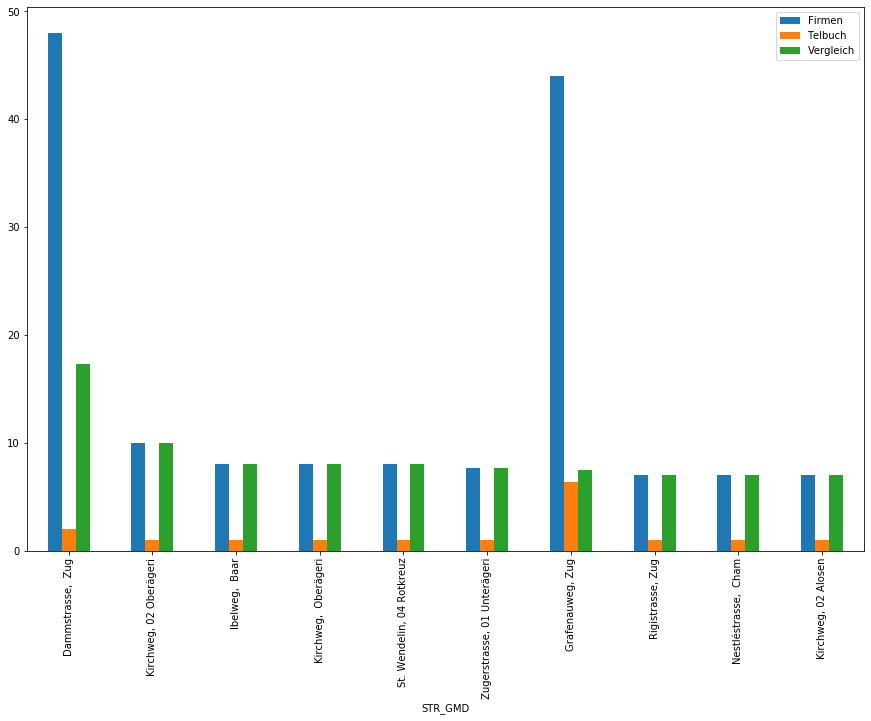

In [56]:
df_hoechstvergleich_durch[["Firmen", "Telbuch", "Vergleich"]].head(10).plot(kind="bar", figsize=(15,10))

### Vergleichswert/Firmen pro Strasse


In [54]:
#... und auch den höchsen Vergleichswert. 
dfhr.groupby("STRNAME").sum().sort_values("Vergleich",ascending=False).head(20)

,Firmen,Telbuch,Vergleich
STRNAME,,,
Zugerstrasse,1320,1507,284.536263
Baarerstrasse,2911,1150,224.189311
Industriestrasse,990,790,160.410380
Chamerstrasse,1168,569,158.740214
Bahnhofstrasse,1640,683,140.188307
Hinterbergstrasse,599,429,116.810967
Neuhofstrasse,683,329,114.204588
Bösch,943,466,89.917717
Blegistrasse,698,273,87.705435


In [55]:
# bei der Summe fällt auf
dfhr.groupby("STRNAME").sum().sort_values("Firmen",ascending=False).head(20)

,Firmen,Telbuch,Vergleich
STRNAME,,,
Baarerstrasse,2911,1150,224.189311
Bahnhofstrasse,1640,683,140.188307
Zugerstrasse,1320,1507,284.536263
Chamerstrasse,1168,569,158.740214
Industriestrasse,990,790,160.410380
Bösch,943,466,89.917717
Blegistrasse,698,273,87.705435
Neuhofstrasse,683,329,114.204588
Gewerbestrasse,634,243,62.071393


In [59]:
df_top_verg_strasse=dfhr.groupby("STR_GMD").sum().sort_values("Vergleich",ascending=False).head(10)
df_top_verg_strasse.to_csv(folderpath+"/Zur_Verarbeitung_Grafik/Hoechst_Vergl_absolut_pro_Strasse.csv")
df_top_verg_strasse

,Firmen,Telbuch,Vergleich
STR_GMD,,,
"Baarerstrasse, Zug",2841,1075,192.838505
"Chamerstrasse, Zug",733,302,110.937999
"Bahnhofstrasse, Zug",1308,235,85.686359
"Bösch, Hünenberg",837,328,80.804701
"Zugerstrasse, Baar",514,243,79.435026
"Neuhofstrasse, Baar",347,197,68.266675
"Industriestrasse, Zug",616,245,64.182664
"Hinterbergstrasse, Steinhausen",450,214,56.143297
"Blegistrasse, Baar",307,102,48.264744


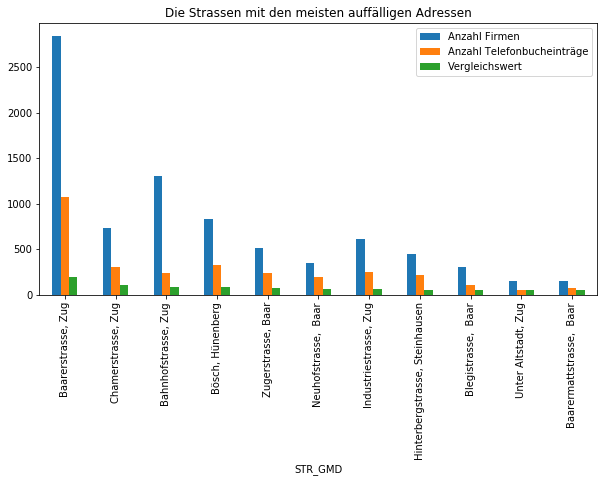

In [57]:
# bei der Summe fällt auf
ax = dfhr.groupby("STR_GMD").sum().sort_values("Vergleich",ascending=False).head(11).plot(kind="bar",figsize=(10,5), title="Die Strassen mit den meisten auffälligen Adressen")

#hat sie die zweihöchste Summe beim Vergleichswert.
ax.legend(["Anzahl Firmen", "Anzahl Telefonbucheinträge", "Vergleichswert"]) # Hier ändere ich die Legende

In [ ]:
# bei der Summe fällt auf
dfhr.groupby("STR_GMD").sum().sort_values("Firmen",ascending=False).head(10).plot(kind="bar",figsize=(10,5), title="Die Strassen mit den meisten Firmen")

Zugerstrasse        225
Baarerstrasse        99
Chamerstrasse        95
Industriestrasse     92
Dorfstrasse          86
                   ... 
Neuhausstrasse        1
Chrüzegg              1
Brunegg               1
Heidengasse           1
Industristrasse       1
Name: STRNAME, Length: 1014, dtype: int64